In [ ]:
!nvidia-smi

Thu Sep 28 05:20:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 8.4 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
!ls

data  data.yaml  runs  Untitled11.ipynb  yolov8s.pt


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

In [ ]:
!ls runs/detect/train9/

args.yaml					     results.png
confusion_matrix_normalized.png			     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1695883133.8aff068a4df6.20867.0  train_batch2.jpg
F1_curve.png					     train_batch90.jpg
labels_correlogram.jpg				     train_batch91.jpg
labels.jpg					     train_batch92.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     weights
results.csv


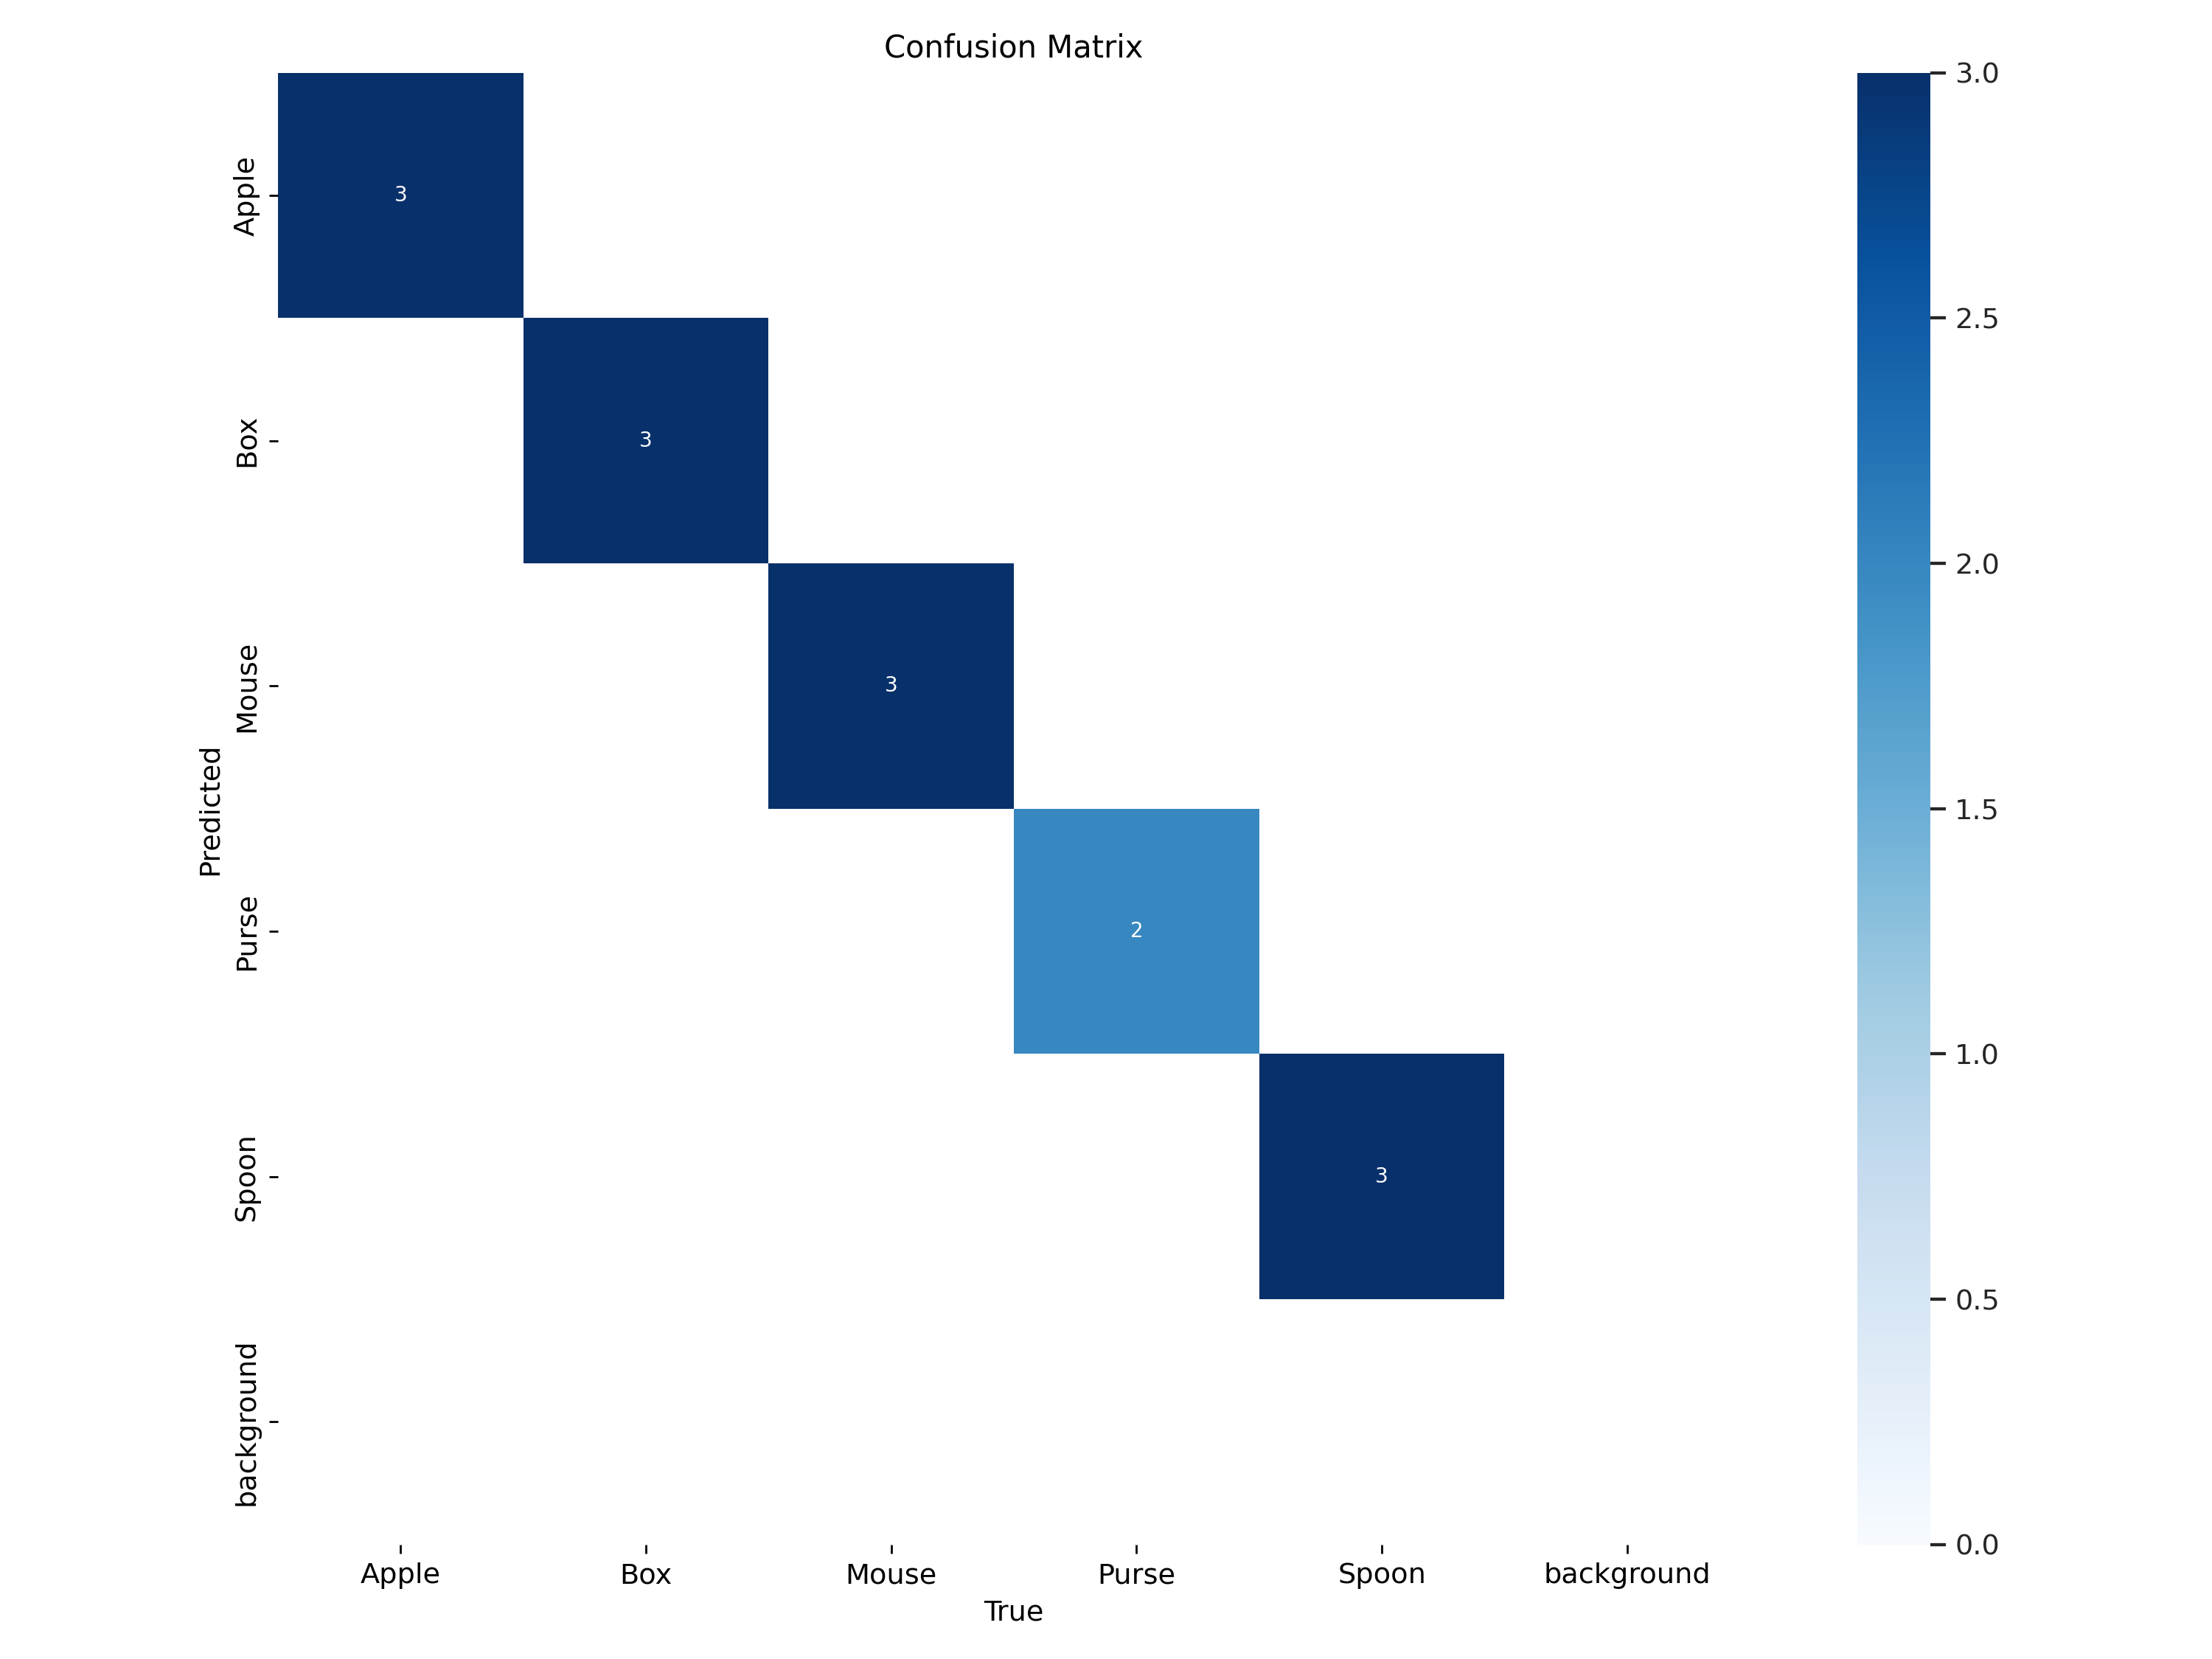

In [ ]:
Image(filename='runs/detect/train9/confusion_matrix.png', width=600)

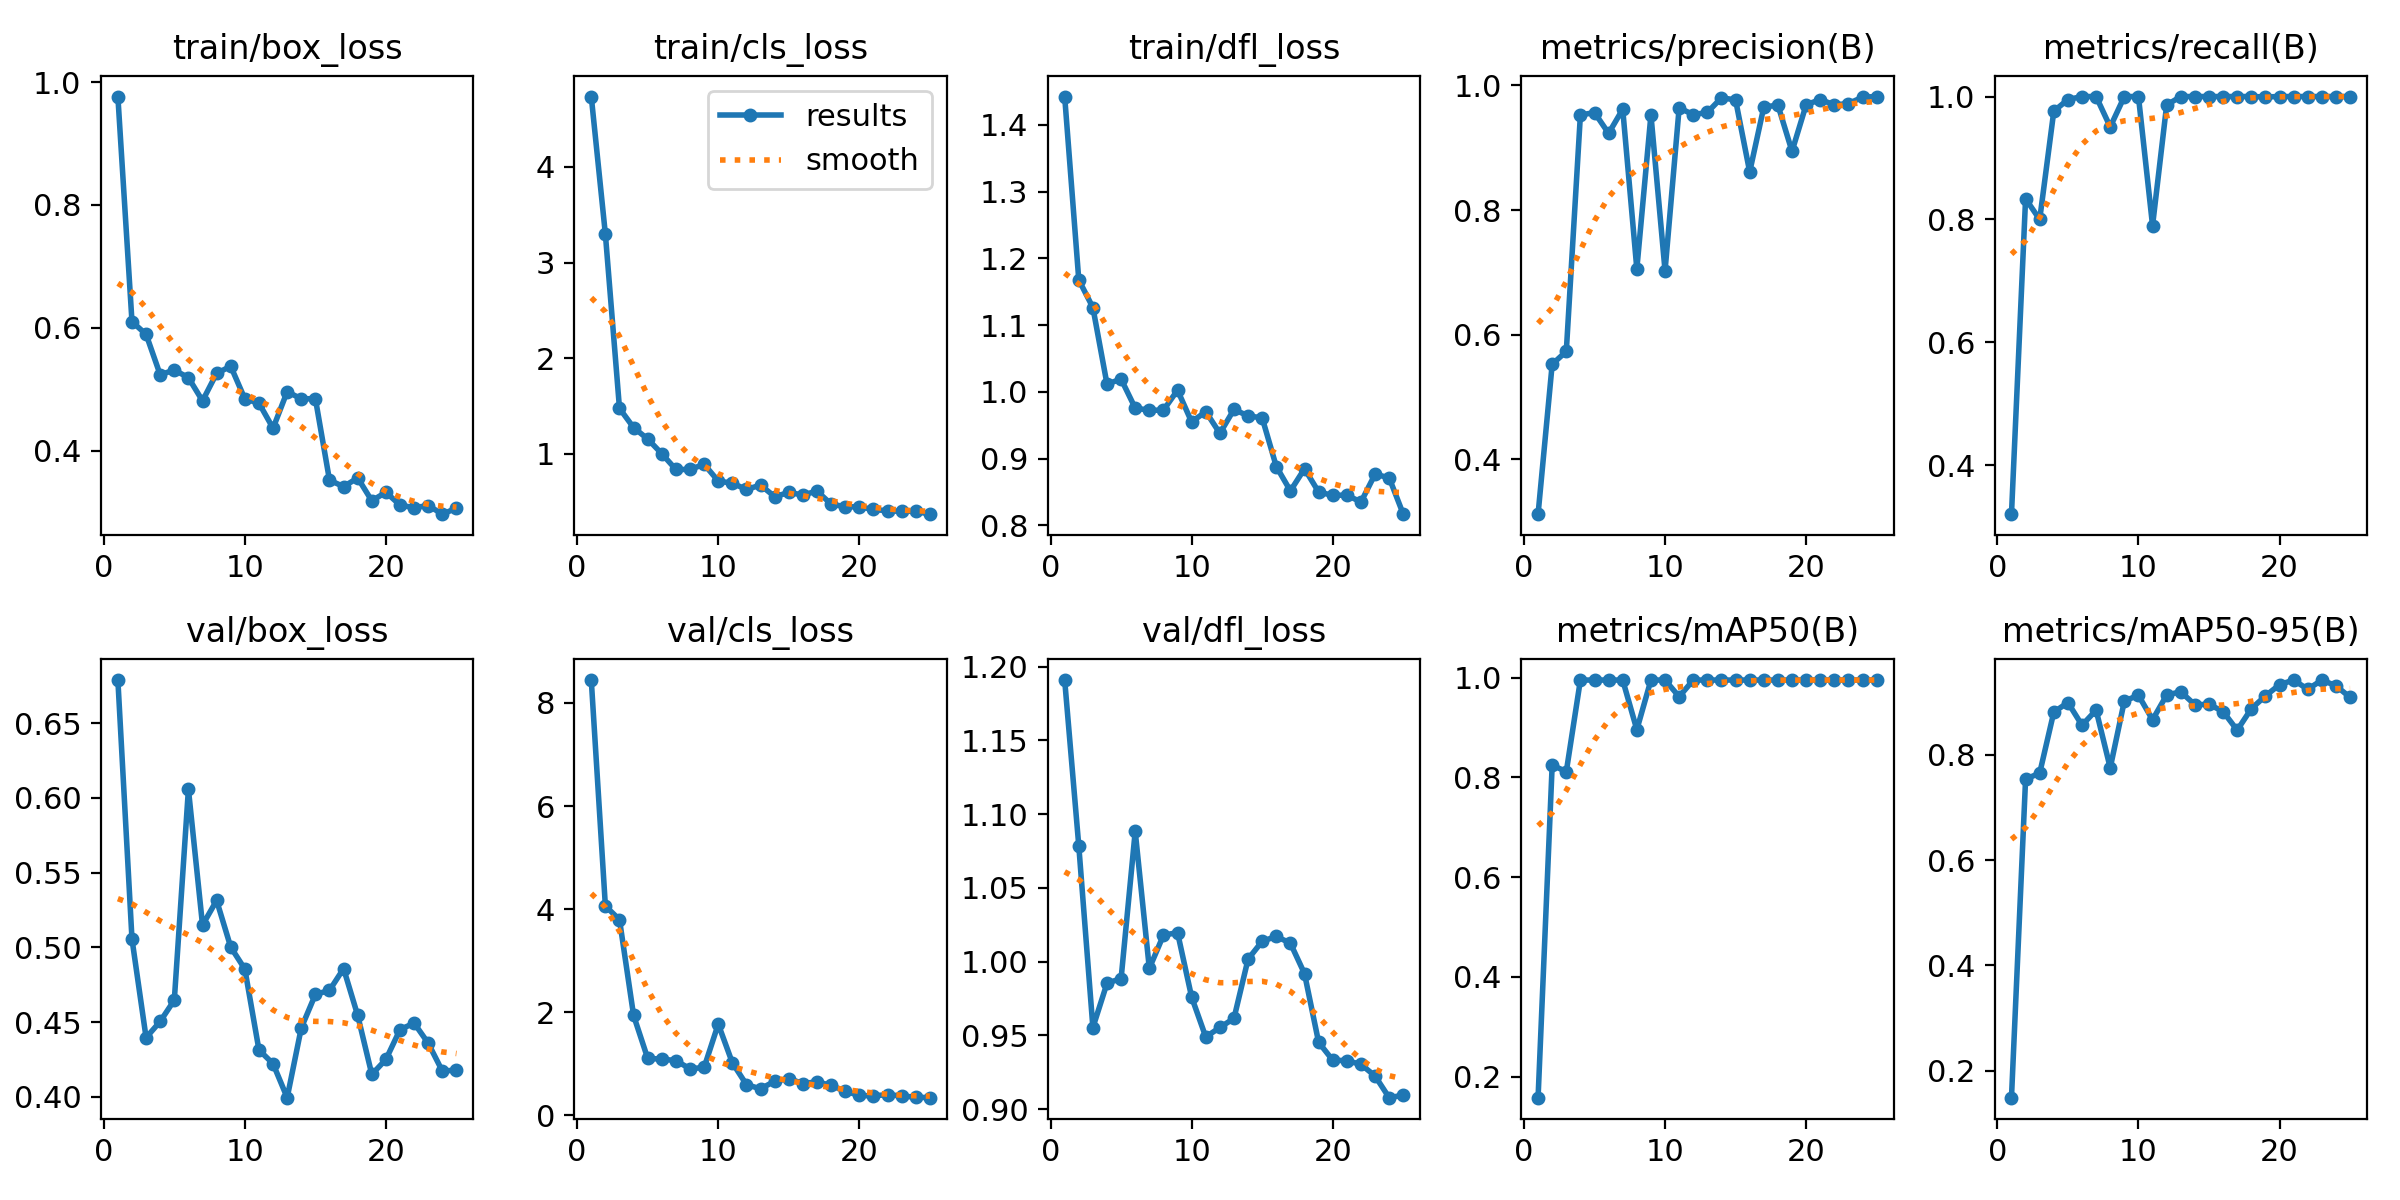

In [ ]:
Image(filename='runs/detect/train9/results.png', width=600)

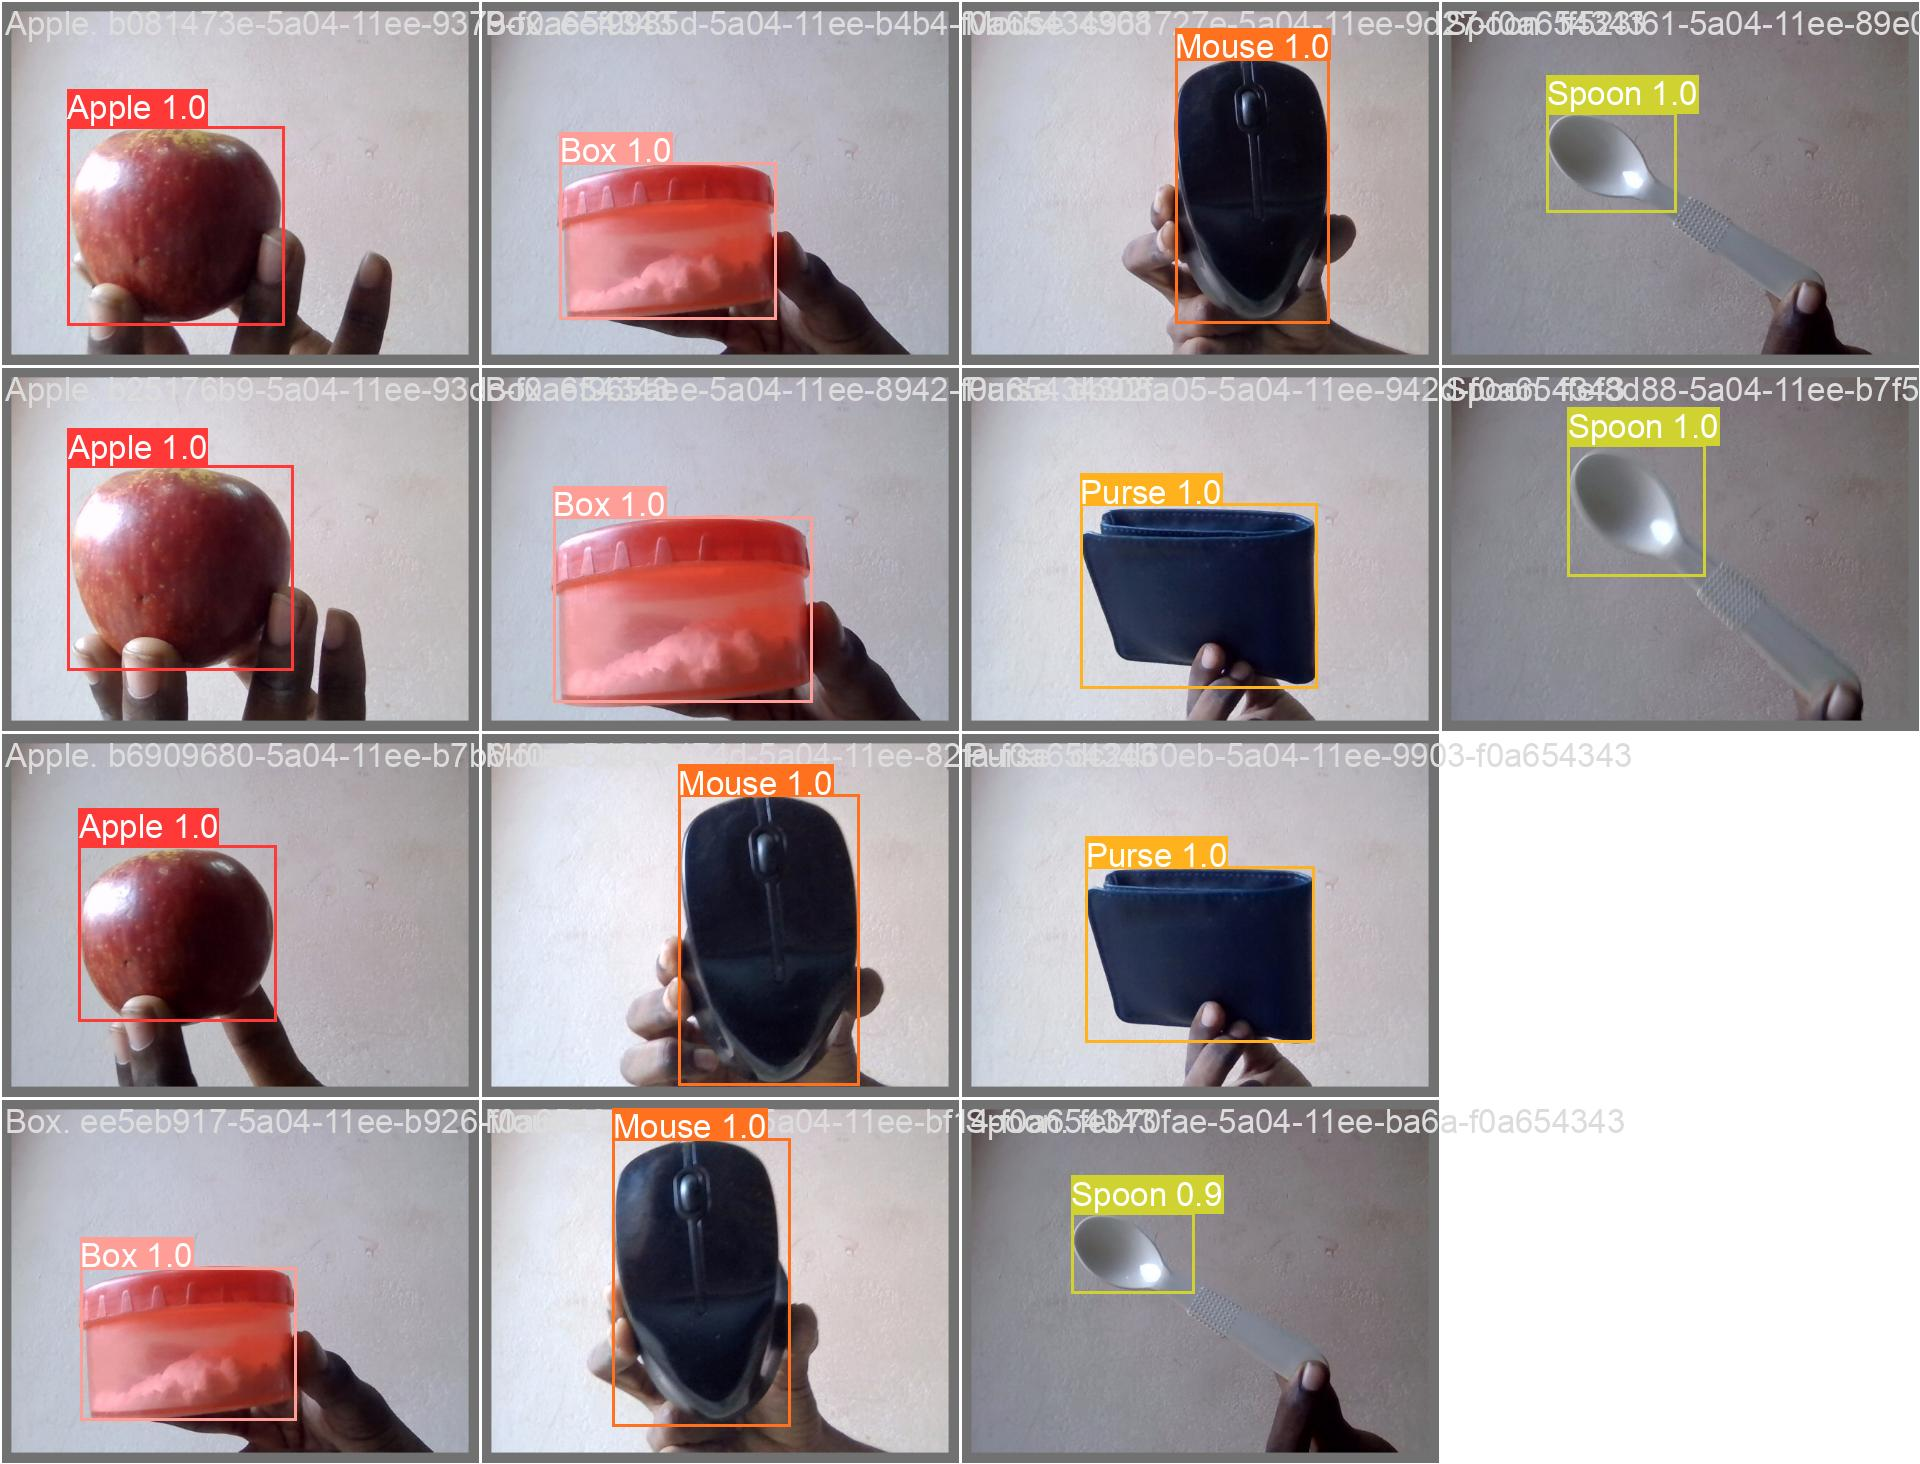

In [ ]:
Image(filename='runs/detect/train9/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train9/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/datasets/data/Valid/labels.cache... 15 images, 0 backgrounds, 1 corrupt: 100% 15/15 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/datasets/data/Valid/images/Purse. dcc7eed8-5a04-11ee-9189-f0a654343086.jpg: ignoring corrupt image/label: Label class 18 exceeds dataset class count 5. Possible class labels are 0-4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.28it/s]
                   all         14         14      0.977          1      0.995       0.94
                 Apple         14          3      0.975          1      0.995      0.951
                   Box         14          3      0.978          1      0.995      0.995
                 Mouse         14          3      0.975          1      0.995      0.995
     

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train9/weights/best.pt conf=0.25 source=data/Test/images

Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients

image 1/15 /content/drive/MyDrive/datasets/data/Test/images/Apple. b3889ad2-5a04-11ee-a463-f0a654343086.jpg: 480x640 1 Apple, 119.7ms
image 2/15 /content/drive/MyDrive/datasets/data/Test/images/Apple. b4230caa-5a04-11ee-b967-f0a654343086.jpg: 480x640 1 Apple, 13.1ms
image 3/15 /content/drive/MyDrive/datasets/data/Test/images/Apple. b5592db5-5a04-11ee-aed3-f0a654343086.jpg: 480x640 1 Apple, 13.1ms
image 4/15 /content/drive/MyDrive/datasets/data/Test/images/Box. ec8b6b69-5a04-11ee-9946-f0a654343086.jpg: 480x640 1 Box, 13.1ms
image 5/15 /content/drive/MyDrive/datasets/data/Test/images/Box. ed25e65c-5a04-11ee-99cf-f0a654343086.jpg: 480x640 1 Box, 13.1ms
image 6/15 /content/drive/MyDrive/datasets/data/Test/images/Box. edc1a686-5a04-11ee-b078-f0a654343086.jpg: 480x640 1 Box, 13.1ms
image 7/15 /content/drive/MyDrive/datasets/data/Test/ima